In [1]:
import pandas as pd

path = "C:\\Users\\herna\\Desktop\\Documentos Gerais\\15 - Projetos Python\\06_Automacao_financeiro\\python\\projeto\\app\\config\\base-gastos-consolidados.xlsx"

df =pd.read_excel(path, engine='openpyxl')

In [2]:
df1 = df.copy()

In [3]:
df = df1.copy()

In [4]:
class Gastos:
    def __init__(self, df):
        self.df = df

    def limpa_caract(self, coluna, caracter):
        self.df[coluna]=self.df[coluna].apply(lambda x: x.replace(caracter,''))

    def subtitui_hifen(self, coluna):
        self.df[coluna]=self.df[coluna].apply(lambda x: x.replace('-',' '))
    
    def limpa_right(self, coluna,caract):
        self.df[coluna]=self.df[coluna].apply(lambda x: 
            x.split(caract)[0:-1] if len(x.split(caract))>1 else x)
        self.df[coluna]=self.df[coluna].apply(lambda x: ' '.join(x) 
            if type(x)==list else x)
    
    def classifica_df(self, coluna):
        self.df[coluna] = self.df[coluna].sort_values(by=coluna,ascending=True)

    def salva_df(self):
        return self.df


In [5]:
gastos = Gastos(df)

gastos.limpa_caract('lançamento', '/')
gastos.subtitui_hifen('lançamento')
gastos.limpa_right('lançamento', ' ')
df = gastos.salva_df()

In [6]:
df.iloc[1294]

data            2024-06-17 00:00:00
lançamento    Mercadolivre*centrald
valor                         99.99
Tipo                        credito
Name: 1294, dtype: object

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
import numpy as np

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
max_score = 0

# Carregar os dados
data = df.copy()
for valor_max_features in range(1000,10000,1000):
    for cluster in range(18, 30):
        print(f'Número de max_features: {valor_max_features}')
        print(f'Número de clusters: {cluster}')
        for valor_n_grama in range(1, 7):
            for valor_max_df in np.arange(1.0, 0.51, -0.1):
                for valor_min_df in np.arange(0.0, 0.5, 0.01):
                    # Transformar a coluna 'lançamento' usando TF-IDF
                    tfidf = TfidfVectorizer(max_features=valor_max_features, 
                                            ngram_range=(1, valor_n_grama), 
                                            min_df=valor_min_df,
                                            max_df=valor_max_df)
                    try:
                        lançamento_tfidf = tfidf.fit_transform(data['lançamento']).toarray()
                    except ValueError as e:
                        continue

                    # Transformar a coluna 'Tipo' usando One-Hot Encoding
                    onehot = OneHotEncoder()
                    tipo_onehot = onehot.fit_transform(data[['Tipo']]).toarray()

                    # Concatenar as colunas transformadas e a coluna 'valor'
                    X = np.hstack((lançamento_tfidf, tipo_onehot, data[['valor']].values))

                    # Normalizar os dados
                    scaler = StandardScaler()
                    X_scaled = scaler.fit_transform(X)

                    # Aplicar K-means com inicialização K-means++
                    kmeans = KMeans(n_clusters=cluster, init='k-means++', random_state=42)
                    kmeans.fit(X_scaled)
                    labels = kmeans.fit_predict(X_scaled)
                    actual_score = silhouette_score(X_scaled, labels)
                    data['Cluster'] = kmeans.labels_

                    if actual_score > max_score:
                        max_score = actual_score
                        print(f'Número de clusters: {cluster} | '    
                        f'Silhouette Score: {max_score} | '
                        f'Valor max_features: {valor_max_features} | '
                        f'Valor n_grama: {valor_n_grama} | '
                        f'Valor min_df: {valor_min_df} | '
                        f'Valor max_df: {valor_max_df}')

                # Mostrar os primeiros registros do DataFrame com a coluna de clusters
                

# Método do cotovelo para determinar o número ideal de clusters
import matplotlib.pyplot as plt

# Calcular o erro quadrado dentro do cluster (inertia) para diferentes valores de k
inertia = []
for k in range(1, cluster):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, cluster), inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()


Número de clusters: 23 | Silhouette Score: 0.9482022480080229 | Valor max_features: 1000 | Valor n_grama: 2 | Valor min_df: 0.04 | Valor max_df: 1.0


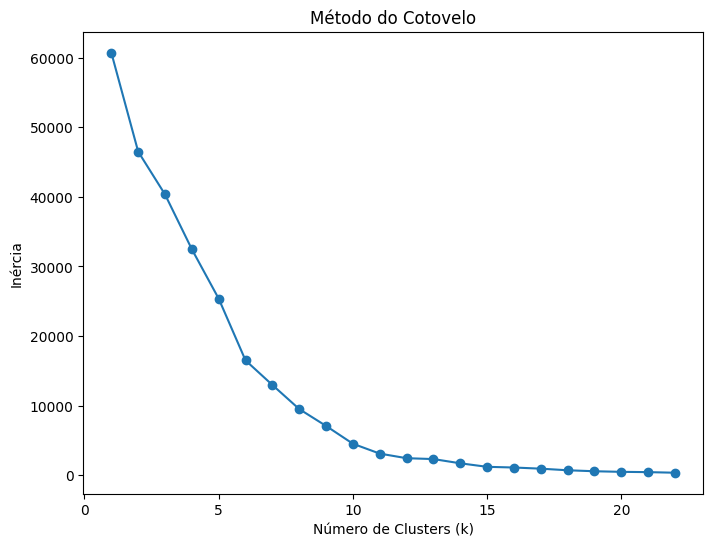

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
import numpy as np

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
max_score = 0

# Carregar os dados
data = df.copy()

cluster = 23
valor_max_features = 1000
valor_n_grama = 2
valor_max_df = 1.0
valor_min_df = 0.04

# Transformar a coluna 'lançamento' usando TF-IDF
tfidf = TfidfVectorizer(max_features=valor_max_features, 
                        ngram_range=(1, valor_n_grama), 
                        min_df=valor_min_df,
                        max_df=valor_max_df)


# Transformar a coluna 'Tipo' usando One-Hot Encoding
onehot = OneHotEncoder()
tipo_onehot = onehot.fit_transform(data[['Tipo']]).toarray()

lançamento_tfidf = tfidf.fit_transform(data['lançamento']).toarray()

# Concatenar as colunas transformadas e a coluna 'valor'
X = np.hstack((lançamento_tfidf, tipo_onehot, data[['valor']].values))

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-means com inicialização K-means++
kmeans = KMeans(n_clusters=cluster, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.fit_predict(X_scaled)
actual_score = silhouette_score(X_scaled, labels)
data['Cluster'] = kmeans.labels_

if actual_score > max_score:
    max_score = actual_score
    print(f'Número de clusters: {cluster} | '    
    f'Silhouette Score: {max_score} | '
    f'Valor max_features: {valor_max_features} | '
    f'Valor n_grama: {valor_n_grama} | '
    f'Valor min_df: {valor_min_df} | '
    f'Valor max_df: {valor_max_df}')

# Mostrar os primeiros registros do DataFrame com a coluna de clusters
                

# Método do cotovelo para determinar o número ideal de clusters
import matplotlib.pyplot as plt

# Calcular o erro quadrado dentro do cluster (inertia) para diferentes valores de k
inertia = []
for k in range(1, cluster):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, cluster), inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()


In [ ]:
df1

In [9]:
c = data.sort_values(by='Cluster', ascending=True)

In [ ]:
c

In [10]:
c.to_excel('df_clusterizado.xlsx', index=False)